# CIFAR 10 DATASET: IMAGE CLASSIFICATION USING CNN



### DATASET WALKTRHOUGH
* CIFAR 10 dataset comprises of 60,000 images total , divided into 10 distinct classes , with each category having 6000 images of shape 32*32(low resolution)


https://www.cs.toronto.edu/~kriz/cifar.html

* The 10 different classes of this dataset are:

1.    Airplane 

2.    Car 

3.    Bird 

4.    Cat 

5.    Deer 

6.    Dog 

7.    Frog 

8.   Horse 

9.    Ship 

10. Truck

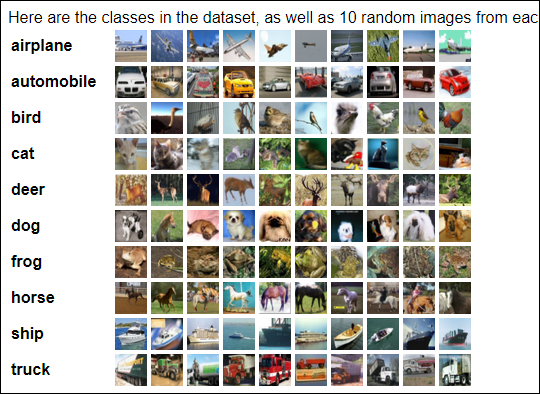

## ML WORKFLOW:

0) PREPARE THE ENVIRONMENT 

1) GETTING THE DATASET 

2) DATA VISUALIZATION AND BASIC EDA 

3) 

## STEP : PREPARE ENVIRONMENT

In [56]:
## PREPARING ENVIRONMENT: INSTALLING NECESSARY LIBRARIES 

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt 
import keras 
import numpy as np
from keras.datasets import cifar10

# -------------------------------------------------------



## STEP : OBTAIN THE DATA 

* the dataset is available as a part of keras datasets module. We import it directly into our program

In [31]:

(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()


## STEP : EXPLORATORY DATA ANALYSIS

In [3]:
X_train.shape

# there are 50000 training samples 
# each image is 32*32 ; these are colored images hence 3 channels of R G B 


(50000, 32, 32, 3)

In [4]:
X_test.shape
# there are 10000 images with similar dimensions as before 

(10000, 32, 32, 3)

In [5]:
# lets see how Y_train looks like 
Y_train.shape , Y_train[0:5]

# we see array is 2D but holds single elements only. 
# We should convert to 1D array for ease

((50000, 1),
 array([[6],
        [9],
        [9],
        [4],
        [1]], dtype=uint8))

In [6]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]             #  a peek into reshaped array

Y_test = Y_test.reshape(-1,) # do same for test set labels also

## STEP: IMAGE PLOTTING FOR VISUALIZATION 


In [7]:
# lets see internal structure 

X_train[0]  # represents 1 image 
            # can clearly see the 3 channels


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

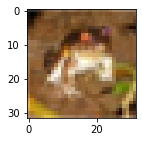

In [53]:
# now lets quickly plot this image using imshow()

plt.figure(figsize=(2,2))  # to control image size 
plt.imshow(X_train[0]) ; # car


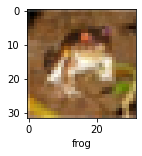

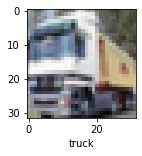

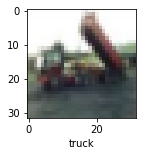

In [9]:
# lets create a function for better visualization 
# we define 2 variables to control from what pt to view images and till where
# we also attach their labels 

start =  0  
k = 3

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]




def plot_images(start,k):
    for i in range(start,start+k):
        plt.figure(figsize=(2,2))
        plt.imshow(X_train[i])
        plt.xlabel(classes[Y_train[i]])
        
plot_images(start,k)

## IMAGE NORMALIZATION


* Normalize the images to a number from 0 to 1.

* Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. 

* Hence to normalize in 0-->1 range, we need to divide it by 255

### NOTE: we first wont perform normalization, just to compare results



# DEEP LEARNING MODELS

* before we use CNN, it's of interest to set a baseline/benchmark model : We'll use an Artificial Neural Network 

* later we can compare the performance of CNN over ANN 


In [10]:
# WITHOUT NORMALIZATION

ANN_MODEL = models.Sequential([
            layers.Flatten(input_shape=(32,32,3)),
    
            layers.Dense(3000, activation='relu'),   # used ReLu activation , we have a dense layer of 3000 neurons
    
            layers.Dense(1000, activation='relu'),   # then another layer of 1000 neurons
    
            layers.Dense(10, activation='softmax')  # at the end we use SOFTMAX CLASSFIER as its a classification problem
                                ])

ANN_MODEL.compile(   optimizer='SGD',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

ANN_MODEL.fit(X_train, Y_train, epochs=5)   # epochs can vary ;


Epoch 1/5
1563/1563 [==============================] - 124s 79ms/step - loss: nan - accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 125s 80ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 133s 85ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 138s 88ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 118s 76ms/step - loss: nan - accuracy: 0.1000


In [25]:
# WITHOUT NORMALIZATION IT IS JUST A 10% ACCURACY

In [12]:
# PERFORMING NORMALIZATION 

X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
# WITH NORMALIZATION

ANN_MODEL = models.Sequential([
            layers.Flatten(input_shape=(32,32,3)),
    
            layers.Dense(3000, activation='relu'),   # used ReLu activation , we have a dense layer of 3000 neurons
    
            layers.Dense(1000, activation='relu'),   # then another layer of 1000 neurons
    
            layers.Dense(10, activation='softmax')  # at the end we use SOFTMAX CLASSFIER as its a classification problem
                                ])

ANN_MODEL.compile(   optimizer='SGD',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

ANN_MODEL.fit(X_train, Y_train, epochs=5)   # epochs can vary ;




Epoch 1/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.8149 - accuracy: 0.3514
Epoch 2/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.6251 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 129s 82ms/step - loss: 1.5437 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.4848 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 127s 81ms/step - loss: 1.4351 - accuracy: 0.4954


**ACCURACY HAS IMPROVED A LOT !** 

* LETS SEE THE RESULTS FOR TEST DATA 

In [24]:
ANN_MODEL.evaluate(X_test, Y_test)
# gives 41% accuracy on TEST DATA 

313/313 [==============================] - 7s 22ms/step - loss: 1.6062 - accuracy: 0.4107


[1.6061853170394897, 0.4106999933719635]

In [14]:
# BUILDLING A CLASSIFICATION REPORT : gives precision ,recall and F1 score on each class

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
Y_predicted = ANN_MODEL.predict(X_test)
Y_predicted_classes = [np.argmax(val) for val in Y_predicted ]

print("Classification Report: \n", classification_report(Y_test, Y_predicted_classes ))

313/313 [==============================] - 6s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.51      0.50      1000
           1       0.65      0.53      0.58      1000
           2       0.19      0.79      0.31      1000
           3       0.44      0.17      0.24      1000
           4       0.53      0.15      0.23      1000
           5       0.50      0.24      0.33      1000
           6       0.62      0.30      0.41      1000
           7       0.54      0.48      0.51      1000
           8       0.78      0.38      0.51      1000
           9       0.55      0.55      0.55      1000

    accuracy                           0.41     10000
   macro avg       0.53      0.41      0.42     10000
weighted avg       0.53      0.41      0.42     10000



# STEP : BUILDING A CONVOLUTIONAL NEURAL NETWORK 




In [46]:
# can detect 30 different edges 
 
CNN_MODEL= models.Sequential([  
    
        # convolution and pooling - LAYER 1 
        layers.Conv2D(filters=50 ,kernel_size=(3,3) , padding='same',strides=(1,1) , activation='relu' , input_shape=(32, 32, 3)) ,
        layers.MaxPooling2D(pool_size=(2, 2)  ),
        layers.Dropout(0.25), 
                  
        # convolution and pooling - LAYER 2 
        layers.Conv2D(filters=100, kernel_size=(3, 3), padding='same', strides=(1,1) ,activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

                
        layers.Flatten(),
        layers.Dense(250, activation='relu'),
    
        layers.Dense(125, activation='relu'),
    
        layers.Dense(10, activation='softmax')
                
    
             
                  ] )

In [47]:
CNN_MODEL.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history = CNN_MODEL.fit(X_train, Y_train, epochs=15)

# after 15 epochs, we get 95.43% accuracy. 
# COMPARING THIS WITH ANN , at 5th epoch
# ACCURACY : ANN ->  49.54% 
# ACCURACY: CNN  ->  91.84% 



Epoch 1/15
1563/1563 [==============================] - 171s 109ms/step - loss: 2.3848 - accuracy: 0.3494
Epoch 2/15
1563/1563 [==============================] - 158s 101ms/step - loss: 1.4022 - accuracy: 0.4987
Epoch 3/15
1563/1563 [==============================] - 161s 103ms/step - loss: 1.2431 - accuracy: 0.5608
Epoch 4/15
1563/1563 [==============================] - 163s 104ms/step - loss: 1.1450 - accuracy: 0.5976
Epoch 5/15
1563/1563 [==============================] - 203s 130ms/step - loss: 1.0539 - accuracy: 0.6329
Epoch 6/15
1563/1563 [==============================] - 171s 110ms/step - loss: 0.9817 - accuracy: 0.6571
Epoch 7/15
1563/1563 [==============================] - 160s 102ms/step - loss: 0.9126 - accuracy: 0.6835
Epoch 8/15
1563/1563 [==============================] - 205s 131ms/step - loss: 0.8554 - accuracy: 0.7026
Epoch 9/15
1563/1563 [==============================] - 151s 97ms/step - loss: 0.7949 - accuracy: 0.7264
Epoch 10/15
1563/1563 [========================

In [49]:
## CONCLUSION: usage of CNN has helped us a lot . LETS CHECK PERFORMANCE ON TEST DATA 
CNN_MODEL.evaluate(X_test, Y_test)

# WE GET 68.51% accuracy, which is not that bad. The dataset is tough too. Images of same object are quite different
# Given hyperparameter tuning can be quite time costly, we fix our results at this accuracy 

313/313 [==============================] - 8s 24ms/step - loss: 0.9800 - accuracy: 0.6851


[0.9799978733062744, 0.6851000189781189]

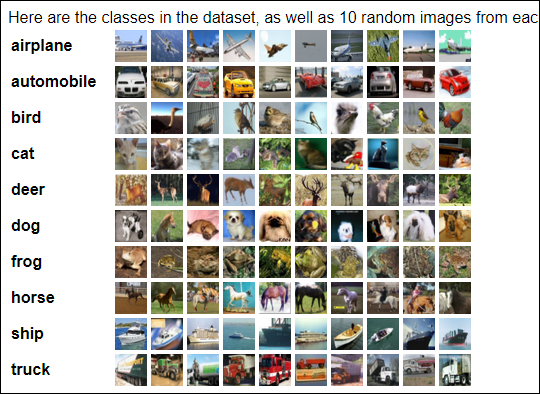

## SAVE THE MODEL 

In [51]:
CNN_MODEL.save('Image_CIFAR10_CNN_classifier.h5')

## WORKING ON THE FRONTEND PART [ in progress]

NameError: name 'load_model' is not defined